In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt 
import pymysql
import numpy as np
from time import perf_counter
import time

pd.options.mode.use_inf_as_na = True
pd.set_option('display.max_rows', 550)
pd.set_option('display.max_columns', 550)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/264856392.py:9: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


In [2]:
import os
current_dir = os.getcwd()
print(current_dir)

/Users/ethan.tait/Library/CloudStorage/OneDrive-PropelHoldingsInc


In [3]:
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection',use_pure=True ,
                              auth_plugin='mysql_native_password')
limit = 2627345182
difference = 100000
lower = 2606355769
upper = lower+difference

i=0
timestart = time.time()
while lower <= limit:
    time0=time.time()
    df_uw_cost = pd.read_sql("""
    SELECT lead_sequence_id, uw_cost, organization_id, insert_date
    FROM datawork.mk_application
    WHERE 
    lead_sequence_id > """ + str(lower) + """
    AND lead_sequence_id <= """ + str(upper) + """
    AND organization_id in (1)
    """, con=conn)
    
    lower = lower + difference
    upper = upper + difference
    
    if i==0:
        leads_a = df_uw_cost.copy()
    else:
        leads_a = pd.concat([leads_a, df_uw_cost], ignore_index=True)
    i+=1    
    print(time.time()-time0)
    print(df_uw_cost.shape)
    print("lower:",lower)
    
conn.close()

print('total time: ', time.time()-timestart)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1457288706.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_uw_cost = pd.read_sql("""


1.9145238399505615
(33400, 4)
lower: 2606455769
1.3515119552612305
(31532, 4)
lower: 2606555769
1.3642878532409668
(33122, 4)
lower: 2606655769
1.393599033355713
(32022, 4)
lower: 2606755769
1.399057149887085
(34228, 4)
lower: 2606855769
1.3658320903778076
(34320, 4)
lower: 2606955769
1.280886173248291
(32575, 4)
lower: 2607055769
1.3648009300231934
(35859, 4)
lower: 2607155769
1.2491719722747803
(34237, 4)
lower: 2607255769
1.3379921913146973
(34275, 4)
lower: 2607355769
1.4205119609832764
(35340, 4)
lower: 2607455769
1.3559150695800781
(33872, 4)
lower: 2607555769
1.3968229293823242
(33976, 4)
lower: 2607655769
1.359217882156372
(35776, 4)
lower: 2607755769
1.275618076324463
(34951, 4)
lower: 2607855769
1.4425687789916992
(35055, 4)
lower: 2607955769
1.3894567489624023
(35433, 4)
lower: 2608055769
1.3447089195251465
(34997, 4)
lower: 2608155769
1.4110181331634521
(36292, 4)
lower: 2608255769
1.3411850929260254
(35987, 4)
lower: 2608355769
1.3378040790557861
(35609, 4)
lower: 26084557

1.8671917915344238
(15967, 4)
lower: 2623755769
2.1704869270324707
(16360, 4)
lower: 2623855769
2.230924129486084
(16603, 4)
lower: 2623955769
1.7014987468719482
(16199, 4)
lower: 2624055769
1.7084219455718994
(16557, 4)
lower: 2624155769
1.7160587310791016
(17266, 4)
lower: 2624255769
1.7229430675506592
(17340, 4)
lower: 2624355769
1.6830027103424072
(14168, 4)
lower: 2624455769
1.7008028030395508
(16641, 4)
lower: 2624555769
1.7051029205322266
(15658, 4)
lower: 2624655769
1.6895978450775146
(17739, 4)
lower: 2624755769
1.8098371028900146
(18245, 4)
lower: 2624855769
1.7141048908233643
(20045, 4)
lower: 2624955769
1.836374044418335
(18584, 4)
lower: 2625055769
1.7047970294952393
(18456, 4)
lower: 2625155769
1.6791207790374756
(19326, 4)
lower: 2625255769
1.7515408992767334
(19190, 4)
lower: 2625355769
1.7172949314117432
(19336, 4)
lower: 2625455769
1.7149848937988281
(18976, 4)
lower: 2625555769
1.775907039642334
(18711, 4)
lower: 2625655769
1.6692659854888916
(18585, 4)
lower: 262575

In [4]:
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection',use_pure=True ,
                              auth_plugin='mysql_native_password')
limit = 2627345182
difference = 100000
lower = 2606355769
upper = lower+difference

i=0
timestart = time.time()
while lower <= limit:
    time0=time.time()
    df_leads = pd.read_sql("""
    SELECT lead_sequence_id, isoriginated, approved_amount, organization_id, received_time
    FROM dwh.rpt_leads_accepted
    WHERE 
    lead_sequence_id > """ + str(lower) + """
    AND lead_sequence_id <= """ + str(upper) + """
    AND organization_id in (1)
    """, con=conn)
    
    lower = lower + difference
    upper = upper + difference
    
    if i==0:
        leads_b = df_leads.copy()
    else:
        leads_b = pd.concat([leads_b, df_leads], ignore_index=True)
    i+=1    
    print(time.time()-time0)
    print(df_leads.shape)
    print("lower:",lower)
    
conn.close()

print('total time: ', time.time()-timestart)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/2426146147.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_leads = pd.read_sql("""


0.2532680034637451
(199, 5)
lower: 2606455769
0.2550349235534668
(463, 5)
lower: 2606555769
0.2587089538574219
(549, 5)
lower: 2606655769
0.24928998947143555
(444, 5)
lower: 2606755769
0.30986690521240234
(438, 5)
lower: 2606855769
0.25392913818359375
(524, 5)
lower: 2606955769
0.25768017768859863
(542, 5)
lower: 2607055769
0.2697000503540039
(575, 5)
lower: 2607155769
0.2675457000732422
(553, 5)
lower: 2607255769
0.2665579319000244
(554, 5)
lower: 2607355769
0.25217199325561523
(402, 5)
lower: 2607455769
0.25878381729125977
(409, 5)
lower: 2607555769
0.26770615577697754
(444, 5)
lower: 2607655769
0.26186609268188477
(431, 5)
lower: 2607755769
0.25812816619873047
(431, 5)
lower: 2607855769
0.2559828758239746
(398, 5)
lower: 2607955769
0.2716517448425293
(375, 5)
lower: 2608055769
0.2587571144104004
(555, 5)
lower: 2608155769
0.2560131549835205
(348, 5)
lower: 2608255769
0.2552978992462158
(349, 5)
lower: 2608355769
0.2565338611602783
(410, 5)
lower: 2608455769
0.23759794235229492
(359,

0.26659703254699707
(791, 5)
lower: 2624155769
0.25547099113464355
(655, 5)
lower: 2624255769
0.2577228546142578
(805, 5)
lower: 2624355769
0.25426602363586426
(624, 5)
lower: 2624455769
0.2670419216156006
(898, 5)
lower: 2624555769
0.26454877853393555
(806, 5)
lower: 2624655769
0.2531619071960449
(541, 5)
lower: 2624755769
0.25795698165893555
(694, 5)
lower: 2624855769
0.2624661922454834
(768, 5)
lower: 2624955769
0.26491498947143555
(544, 5)
lower: 2625055769
0.25672197341918945
(641, 5)
lower: 2625155769
0.300368070602417
(754, 5)
lower: 2625255769
0.3127431869506836
(716, 5)
lower: 2625355769
0.2662210464477539
(846, 5)
lower: 2625455769
0.26693177223205566
(628, 5)
lower: 2625555769
0.27375006675720215
(644, 5)
lower: 2625655769
0.27656102180480957
(803, 5)
lower: 2625755769
0.26403307914733887
(627, 5)
lower: 2625855769
0.26121091842651367
(686, 5)
lower: 2625955769
0.2859518527984619
(721, 5)
lower: 2626055769
0.26941490173339844
(653, 5)
lower: 2626155769
0.27936291694641113
(7

In [5]:
print("df_uw_cost:")
print(df_uw_cost.head())
print(df_uw_cost.dtypes)
print(df_uw_cost['insert_date'].min(), df_uw_cost['insert_date'].max())

df_uw_cost:
   lead_sequence_id  uw_cost  organization_id         insert_date
0        2627255783     0.00                1 2024-05-16 15:25:41
1        2627255786     0.00                1 2024-05-16 15:25:40
2        2627255793     0.00                1 2024-05-16 15:25:42
3        2627255794     0.04                1 2024-05-16 15:25:43
4        2627255796     0.00                1 2024-05-16 15:25:42
lead_sequence_id             int64
uw_cost                    float64
organization_id              int64
insert_date         datetime64[ns]
dtype: object
2024-05-16 15:25:40 2024-05-17 03:25:53


In [6]:
print(leads_a.head())
print(leads_a.dtypes)
print(leads_a['insert_date'].min(), leads_a['insert_date'].max())

   lead_sequence_id  uw_cost  organization_id         insert_date
0        2606355774     0.00                1 2024-02-01 00:00:07
1        2606355778     0.04                1 2024-02-01 00:00:10
2        2606355783     0.00                1 2024-02-01 00:00:14
3        2606355785     0.00                1 2024-02-01 00:00:16
4        2606355803     0.00                1 2024-02-01 00:00:38
lead_sequence_id             int64
uw_cost                    float64
organization_id              int64
insert_date         datetime64[ns]
dtype: object
2024-02-01 00:00:07 2024-05-17 03:25:53


In [7]:
print(leads_b.head())
print(leads_b.dtypes)
print(leads_b['received_time'].min(), leads_b['received_time'].max())

   lead_sequence_id  isoriginated  approved_amount  organization_id  \
0        2606359590             1           1000.0                1   
1        2606359745             1           1125.0                1   
2        2606360760             1            325.0                1   
3        2606360911             0           1150.0                1   
4        2606360949             0           1700.0                1   

        received_time  
0 2024-02-01 00:50:33  
1 2024-02-01 00:52:30  
2 2024-02-01 01:07:08  
3 2024-02-01 01:09:30  
4 2024-02-01 01:10:00  
lead_sequence_id             int64
isoriginated                 int64
approved_amount            float64
organization_id              int64
received_time       datetime64[ns]
dtype: object
2024-02-01 00:50:33 2024-05-17 03:15:40


In [8]:
print("df_leads:")
print(df_leads.head())
print(df_leads.dtypes)
print(df_leads['received_time'].min(), df_leads['received_time'].max())

df_leads:
   lead_sequence_id  isoriginated  approved_amount  organization_id  \
0        2627256528             0           1800.0                1   
1        2627256615             0           1450.0                1   
2        2627256758             0           2500.0                1   
3        2627257023             0           2500.0                1   
4        2627257064             0           2500.0                1   

        received_time  
0 2024-05-16 15:28:27  
1 2024-05-16 15:28:50  
2 2024-05-16 15:29:17  
3 2024-05-16 15:30:08  
4 2024-05-16 15:30:15  
lead_sequence_id             int64
isoriginated                 int64
approved_amount            float64
organization_id              int64
received_time       datetime64[ns]
dtype: object
2024-05-16 15:28:27 2024-05-17 03:15:40


In [9]:
df = pd.merge(leads_a, leads_b, on='lead_sequence_id')
print(df.head())
print(df.dtypes)
print(df['insert_date'].min(), df['insert_date'].max())

   lead_sequence_id  uw_cost  organization_id_x         insert_date  \
0        2606359590     0.05                  1 2024-02-01 00:50:33   
1        2606359745     2.40                  1 2024-02-01 00:52:30   
2        2606360760     0.10                  1 2024-02-01 01:07:08   
3        2606360911     2.35                  1 2024-02-01 01:09:30   
4        2606360949     0.10                  1 2024-02-01 01:10:00   

   isoriginated  approved_amount  organization_id_y       received_time  
0             1           1000.0                  1 2024-02-01 00:50:33  
1             1           1125.0                  1 2024-02-01 00:52:30  
2             1            325.0                  1 2024-02-01 01:07:08  
3             0           1150.0                  1 2024-02-01 01:09:30  
4             0           1700.0                  1 2024-02-01 01:10:00  
lead_sequence_id              int64
uw_cost                     float64
organization_id_x             int64
insert_date          

In [10]:
df_originated = df[df['isoriginated'] == 1]
df_originated['uw_cost'] = pd.to_numeric(df_originated['uw_cost'], errors='coerce')
df_originated['approved_amount'] =pd.to_numeric(df_originated['approved_amount'], errors='coerce')
print(df_originated[['uw_cost', 'approved_amount']].isnull().sum())

uw_cost            0
approved_amount    0
dtype: int64


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/741683802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_originated['uw_cost'] = pd.to_numeric(df_originated['uw_cost'], errors='coerce')
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/741683802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_originated['approved_amount'] =pd.to_numeric(df_originated['approved_amount'], errors='coerce')


In [11]:
df_originated = df_originated.dropna(subset=['uw_cost', 'approved_amount'])

In [12]:
df_originated['cpfl'] = df_originated['uw_cost'] / df_originated['approved_amount'] * 5000
df_originated['insert_date'] = pd.to_datetime(df_originated['insert_date'])
start_date = '2024-02-01'
end_date = '2024-05-17'
df_filtered = df_originated[(df_originated['insert_date'] >= start_date) & (df_originated['insert_date'] <= end_date)]

In [13]:
print(df_filtered.head())
print(df_filtered['insert_date'].min(), df_filtered['insert_date'].max())

    lead_sequence_id  uw_cost  organization_id_x         insert_date  \
0         2606359590     0.05                  1 2024-02-01 00:50:33   
1         2606359745     2.40                  1 2024-02-01 00:52:30   
2         2606360760     0.10                  1 2024-02-01 01:07:08   
9         2606362210     0.10                  1 2024-02-01 01:29:59   
11        2606365602     0.05                  1 2024-02-01 02:26:55   

    isoriginated  approved_amount  organization_id_y       received_time  \
0              1           1000.0                  1 2024-02-01 00:50:33   
1              1           1125.0                  1 2024-02-01 00:52:30   
2              1            325.0                  1 2024-02-01 01:07:08   
9              1            750.0                  1 2024-02-01 01:29:58   
11             1           1575.0                  1 2024-02-01 02:26:54   

         cpfl  
0    0.250000  
1   10.666667  
2    1.538462  
9    0.666667  
11   0.158730  
2024-02-01 00:

In [14]:
df_filtered['week'] = df_filtered['insert_date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_cpfl = df_filtered.groupby('week').agg(
                                    total_uw_cost=('uw_cost', 'sum'),
                                    total_approved_amount=('approved_amount', 'sum')
                            ).reset_index()
weekly_cpfl['cpfl'] = weekly_cpfl['total_uw_cost'] / weekly_cpfl['total_approved_amount'] * 5000

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1664681205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['week'] = df_filtered['insert_date'].dt.to_period('W').apply(lambda r: r.start_time)


In [15]:
print(weekly_cpfl.head())

        week  total_uw_cost  total_approved_amount      cpfl
0 2024-01-29         630.55               475775.0  6.626557
1 2024-02-05         883.59               693300.0  6.372350
2 2024-02-12         713.60               605800.0  5.889733
3 2024-02-19         688.58               581400.0  5.921741
4 2024-02-26         654.70               617100.0  5.304651


## not a great representation - did something wrong 

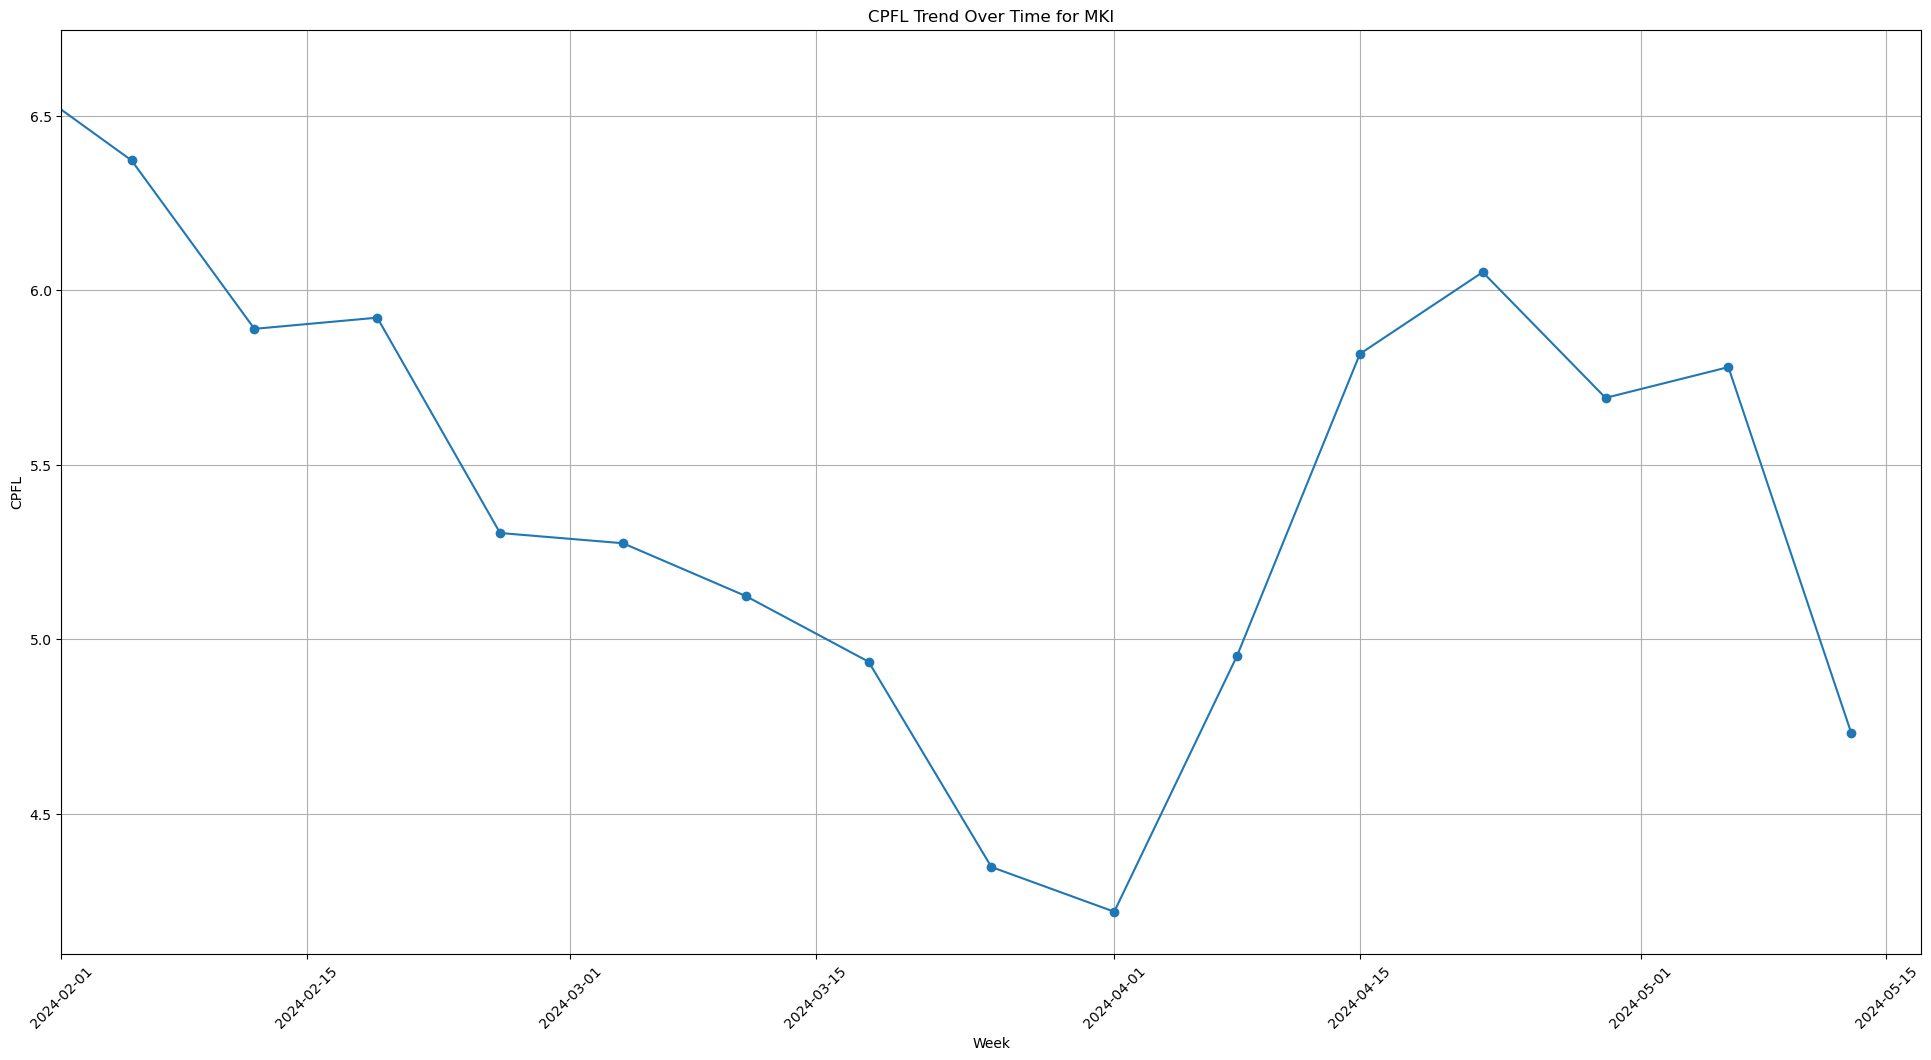

In [17]:
plt.figure(figsize=(24,12))
plt.plot(weekly_cpfl['week'], weekly_cpfl['cpfl'], marker='o')

plt.xlabel('Week')
plt.ylabel('CPFL')
plt.title('CPFL Trend Over Time for MKI')
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))
plt.grid(True)
plt.show()

In [18]:
summary_stats = df_filtered.describe()
print(summary_stats)

       lead_sequence_id       uw_cost  organization_id_x  \
count      1.015400e+04  10154.000000            10154.0   
mean       2.617058e+09      1.142859                1.0   
min        2.606360e+09      0.000000                1.0   
25%        2.612353e+09      0.100000                1.0   
50%        2.617009e+09      1.000000                1.0   
75%        2.622233e+09      2.400000                1.0   
max        2.627345e+09      3.340000                1.0   
std        5.908263e+06      1.063964                0.0   

                         insert_date  isoriginated  approved_amount  \
count                          10154       10154.0     10154.000000   
mean   2024-03-27 02:22:36.220011776           1.0      1048.059878   
min              2024-02-01 00:50:33           1.0       200.000000   
25%       2024-02-29 10:39:27.500000           1.0       600.000000   
50%              2024-03-28 11:41:58           1.0       950.000000   
75%    2024-04-24 16:54:29.750000

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1463544040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cpfl_moving_avg'] = df_filtered['cpfl'].rolling(window=7).mean()


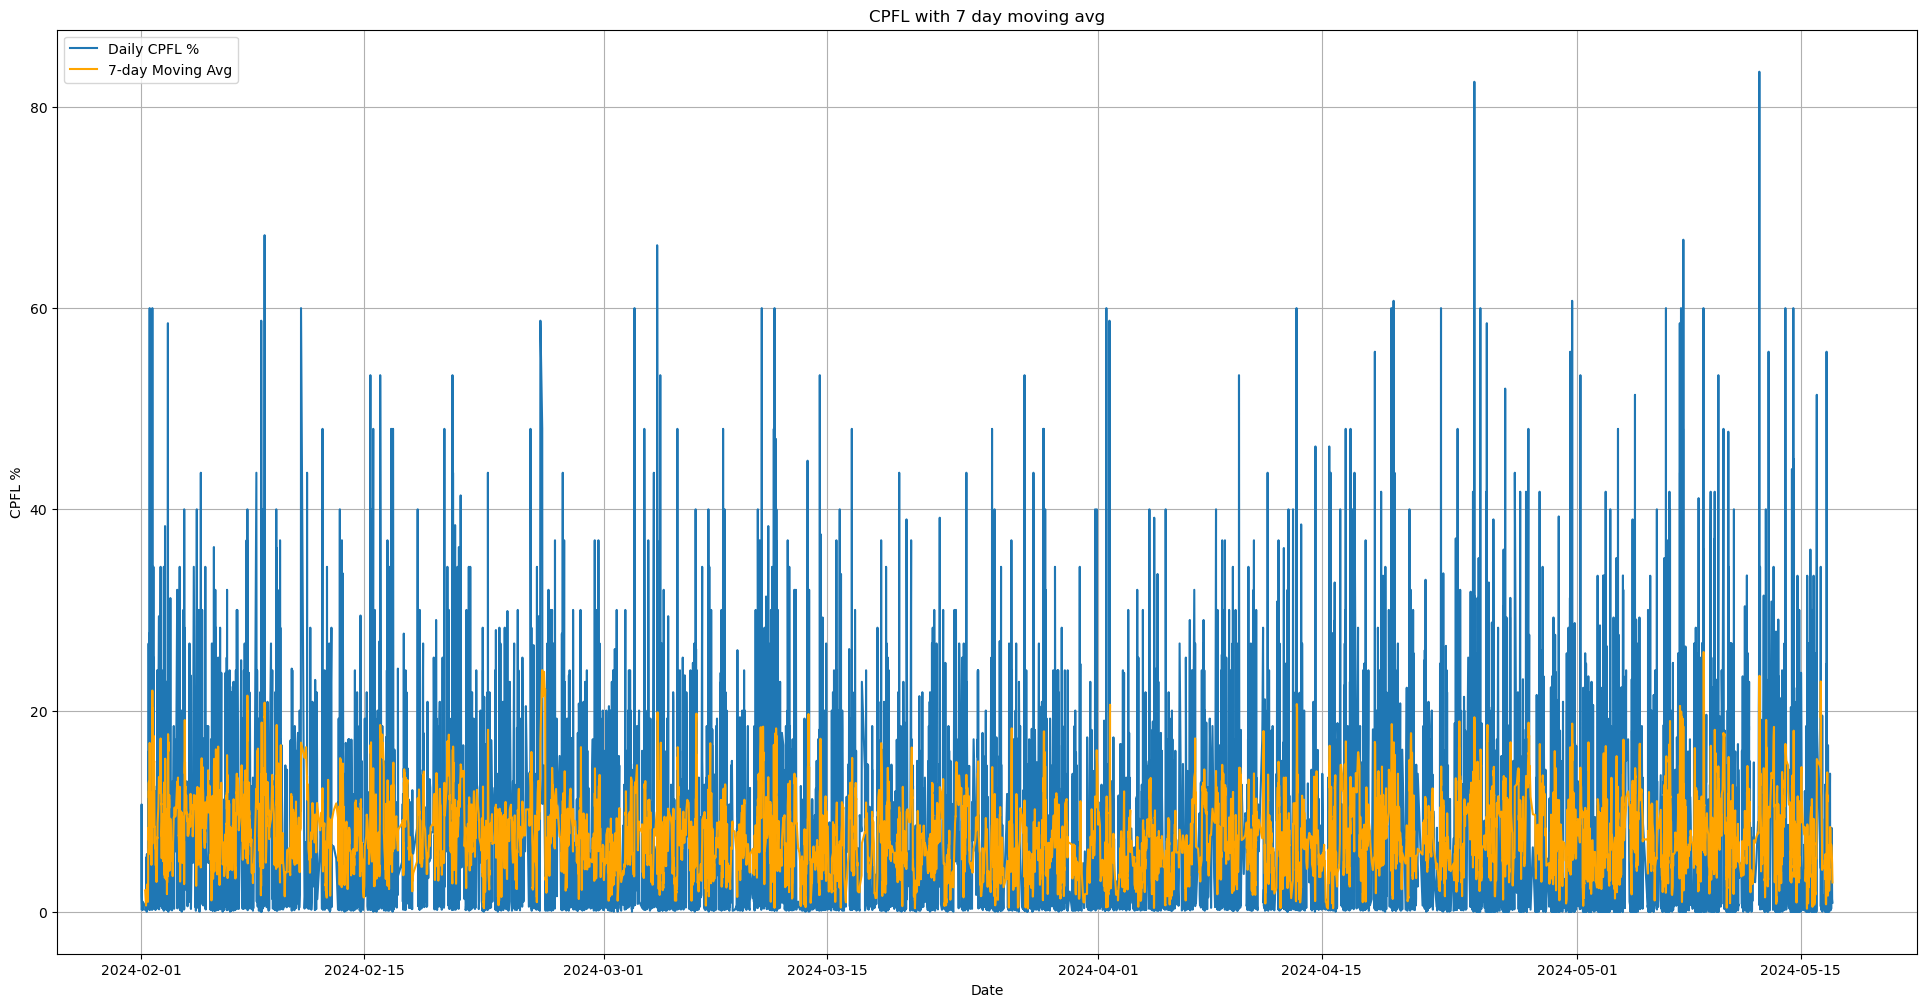

In [19]:
df_filtered['cpfl_moving_avg'] = df_filtered['cpfl'].rolling(window=7).mean()

plt.figure(figsize=(24,12))
plt.plot(df_filtered['insert_date'], df_filtered['cpfl'], label='Daily CPFL %')
plt.plot(df_filtered['insert_date'], df_filtered['cpfl_moving_avg'], label='7-day Moving Avg', color='orange')

plt.xlabel('Date')
plt.ylabel('CPFL %')
plt.title('CPFL with 7 day moving avg')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/2654486510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['insert_date'].dt.day_name()


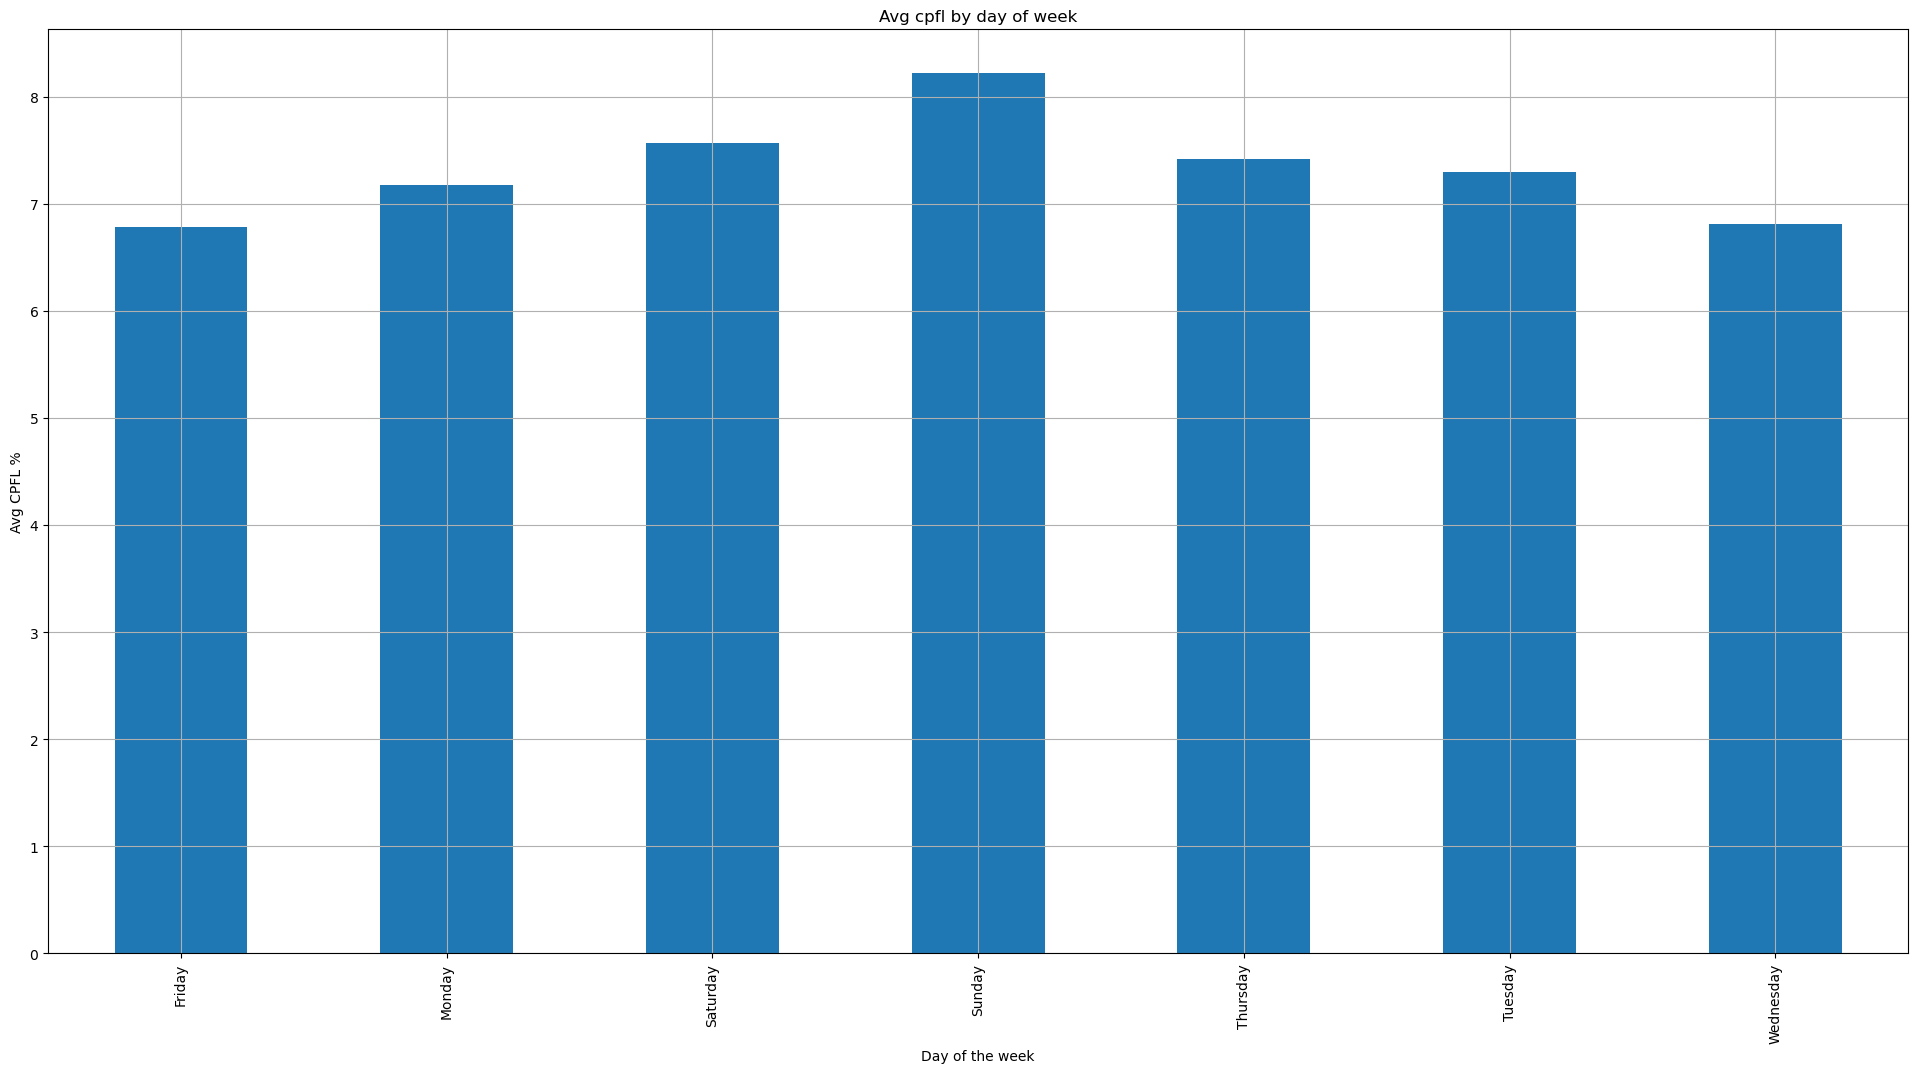

In [20]:
df_filtered['day_of_week'] = df_filtered['insert_date'].dt.day_name()
day_of_week_cpfl = df_filtered.groupby('day_of_week')['cpfl'].mean()

plt.figure(figsize=(24,12))
day_of_week_cpfl.plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Avg CPFL %')
plt.title('Avg cpfl by day of week')
plt.grid(True)
plt.show()

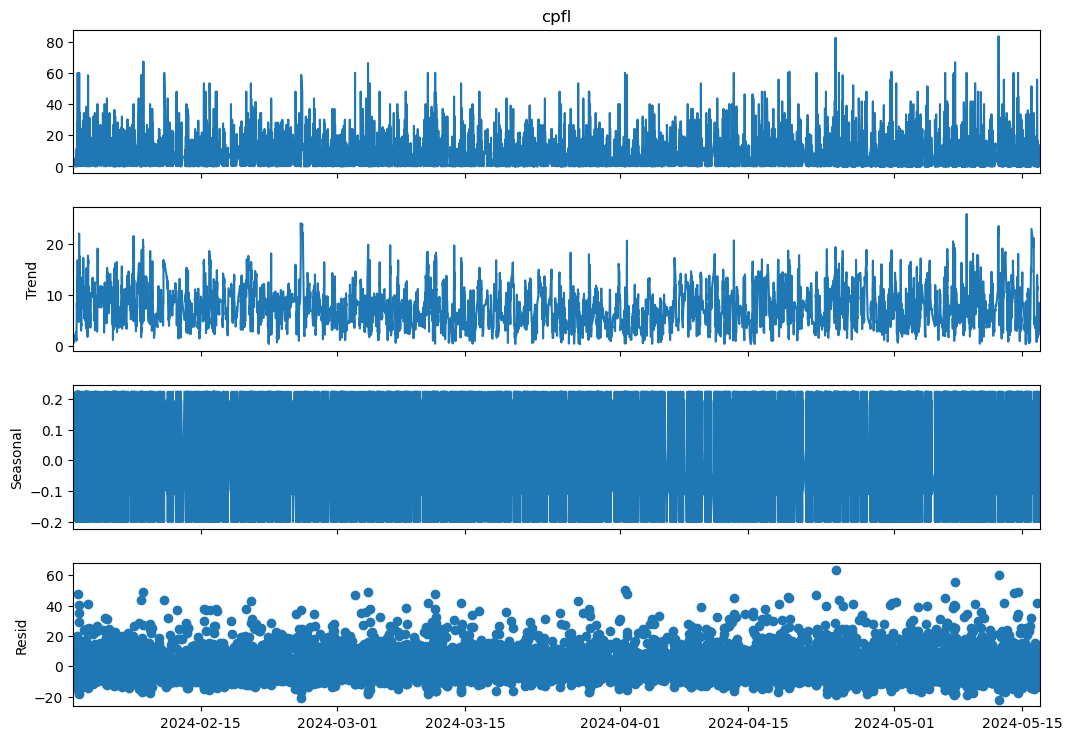

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_filtered.set_index('insert_date', inplace=True)
decomposition = seasonal_decompose(df_filtered['cpfl'], model='additive', period=7)

fig = decomposition.plot()
fig.set_size_inches(12,8)
plt.show()

In [22]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05)
df_filtered['anomoly'] = model.fit_predict(df_filtered[['cpfl']])

plt.figure(figsize=(12,6))
plt.plot(df_filtered['insert_date'], df_filtered['cpfl'], label='CPFL')
plt.scatter(df_filtered[df_filtered['anomaly'] == -1]['insert_date'], df_filtered[df_filtered['anomaly'] == -1]
                                                     ['cpfl'], color='red', label='Anomaly')
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/3030296684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['anomoly'] = model.fit_predict(df_filtered[['cpfl']])


KeyError: 'insert_date'

<Figure size 1200x600 with 0 Axes>

# GitHub findings - using scores?

In [23]:
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection',use_pure=True ,
                              auth_plugin='mysql_native_password')
window = 100000
df = pd.DataFrame()
timestart = time.time()
for i in range(2606355769, 2627345182+window, window):
    time0=time.time()
    params = {"start": i, "end": min(i+window, 2627345182)}
    temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id, 
                          a.uw_stream, am.REJECT_RULE_LIST, a.decision_detail, a.rule_description,
                          a.PR_PRICE, a.lead_source_id, wp.`/wp_pro/identity_check_score` as idc_score, 
                          cbb.`/x/cbb/cbb-score2` as cbb_score, cfi.`/xr/cfi/score` as cfi_score,
                          am.mk_MK_Refresh_MK_Dec2023_score as refresh_score, 
                          am.mk_MK_Refresh_Clarity_Dec2023_score as clarity_score,
                          am.mk_MK_Clarity_risk_May2022_score as old_score,
                          am.mk_conv_score_MK_2021_11_score as conv_score,
                          am.`/graphdb/connected_apps` as connected_apps,
                          if(la.lead_sequence_id is not null, 1, 0) as is_accept,
                          if(la.origination_loan_id is not null, 1, 0) as is_origination
                      from datawork.mk_application a 
                          inner join datawork.mk_application_more am on a.lead_sequence_id = am.lead_sequence_id
                          inner join dwh.rpt_leads_accepted la on a.lead_sequence_id = la.lead_sequence_id
                          left join datawork.mk_whitepages wp on wp.lead_sequence_id = a.lead_sequence_id
                          left join datawork.mk_clearbankbehavior cbb on a.lead_sequence_id = cbb.lead_sequence_id
                          left join datawork.mk_clearfraudinsight cfi on a.lead_sequence_id = cfi.lead_sequence_id
                      where a.uw_stream in ('9', '-1') and a.organization_id = 1
                          and a.lead_sequence_id >= %(start)s and a.lead_sequence_id < %(end)s"""
                       , con=conn, params=params)
    df = pd.concat([df, temp])
    print(i, len(df), len(temp))
    print(time.time()-time0)
    print(temp.shape)
conn.close()
print(df.shape)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2606355769 49 49
0.8404290676116943
(49, 20)
2606455769 108 59
0.9327590465545654
(59, 20)
2606555769 145 37
0.7146520614624023
(37, 20)
2606655769 182 37
1.0239949226379395
(37, 20)
2606755769 235 53
0.8984482288360596
(53, 20)
2606855769 259 24
0.6709978580474854
(24, 20)
2606955769 311 52
0.6476600170135498
(52, 20)
2607055769 332 21
0.7545351982116699
(21, 20)
2607155769 383 51
1.229274034500122
(51, 20)
2607255769 422 39
1.0164539813995361
(39, 20)
2607355769 467 45
0.8370602130889893
(45, 20)
2607455769 496 29
0.618218183517456
(29, 20)
2607555769 526 30
1.0040960311889648
(30, 20)
2607655769 564 38
1.0196669101715088
(38, 20)
2607755769 593 29
1.0301060676574707
(29, 20)
2607855769 619 26
0.6244678497314453
(26, 20)
2607955769 668 49
0.5700321197509766
(49, 20)
2608055769 712 44
1.0281977653503418
(44, 20)
2608155769 749 37
0.9482071399688721
(37, 20)
2608255769 795 46
0.6063768863677979
(46, 20)
2608355769 819 24
0.5956780910491943
(24, 20)
2608455769 866 47
0.5715980529785156


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2618055769 4959 0
1.145352840423584
(0, 20)
2618155769 4960 1
1.2346460819244385
(1, 20)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2618255769 4960 0
0.7811362743377686
(0, 20)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2618355769 4960 0
1.56496000289917
(0, 20)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2618455769 4960 0
0.8239328861236572
(0, 20)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2618555769 4960 0
0.923555850982666
(0, 20)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2618655769 4960 0
0.8221287727355957
(0, 20)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2618755769 4960 0
1.1201748847961426
(0, 20)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2618855769 4960 0
0.7804000377655029
(0, 20)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2618955769 4960 0
0.6971650123596191
(0, 20)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2619055769 4960 0
1.2880580425262451
(0, 20)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""select a.lead_sequence_id, a.insert_date, a.campaign_name, a.organization_id,


2619155769 4960 0
0.7305312156677246
(0, 20)
2619255769 4998 38
1.2130911350250244
(38, 20)
2619355769 5035 37
1.331456184387207
(37, 20)
2619455769 5075 40
1.2422680854797363
(40, 20)
2619555769 5120 45
1.276933193206787
(45, 20)
2619655769 5156 36
0.7181522846221924
(36, 20)
2619755769 5195 39
1.3542520999908447
(39, 20)
2619855769 5227 32
0.7961549758911133
(32, 20)
2619955769 5260 33
0.8019161224365234
(33, 20)
2620055769 5300 40
0.805556058883667
(40, 20)
2620155769 5335 35
0.6769909858703613
(35, 20)
2620255769 5376 41
1.27193284034729
(41, 20)
2620355769 5417 41
1.206265926361084
(41, 20)
2620455769 5463 46
1.304328203201294
(46, 20)
2620555769 5501 38
0.8437612056732178
(38, 20)
2620655769 5551 50
0.7821848392486572
(50, 20)
2620755769 5603 52
0.8821680545806885
(52, 20)
2620855769 5675 72
1.448491096496582
(72, 20)
2620955769 5755 80
1.5666649341583252
(80, 20)
2621055769 5839 84
0.818310022354126
(84, 20)
2621155769 5933 94
0.8435201644897461
(94, 20)
2621255769 5987 54
0.864

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/1515183719.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])


In [24]:
# ensure we only have PR leadgen campaigns in dataset
df = df[~df.campaign_name.isnull()]
df = df[~df.campaign_name.str.contains('#')]
df = df[(df.campaign_name.str.contains('LEAP')) | (df.campaign_name.str.contains('EPC')) 
| (df.campaign_name.str.contains('LMMK')) | (df.campaign_name.str.contains('ACQ'))]
print(len(df))

7958


In [25]:
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection',use_pure=True ,
                              auth_plugin='mysql_native_password')
lsids = df.lead_sequence_id.tolist()
draws = pd.read_sql("""select la.lead_sequence_id, lpsi.payment_schedule_id, lpsi.item_date, lpsi.total_amount from
                       jaglms.lms_payment_schedule_items lpsi 
                       inner join jaglms.lms_payment_schedules lps on lpsi.payment_schedule_id = lps.payment_schedule_id
                       inner join dwh.rpt_leads_accepted la on lps.customer_id = la.lms_customer_id
                       where la.lead_sequence_id in """ + str(tuple(lsids)) + """;""", con=conn)
conn.close()
draw_lsids, draw_amts = [], []
draws.item_date = pd.to_datetime(draws.item_date)
for lsid in lsids:
    draw_lsids.append(lsid)
    insert_date = df[df.lead_sequence_id == lsid].insert_date.tolist()[0]
    filtered = draws[(draws.lead_sequence_id == lsid)& ((draws.item_date-insert_date).dt.days <= 10)]
    draw_amts.append(sum([-x if x < 0 else 0 for x in filtered.total_amount]))
draws2 = pd.DataFrame()
draws2['lead_sequence_id'] = draw_lsids[:]
draws2['seven_day_draw_amount'] = draw_amts[:]
df = pd.merge(left=df, right=draws2, on='lead_sequence_id', how='left')

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_84492/3869999883.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  draws = pd.read_sql("""select la.lead_sequence_id, lpsi.payment_schedule_id, lpsi.item_date, lpsi.total_amount from


In [26]:
df.is_origination.mean()

0.09876853480774064

In [27]:
t1 = df[(df.conv_score <= 800) & ((df.cbb_score > 710) | (df.cfi_score > 730))]
t2 = df[(df.conv_score > 800) & ((df.cbb_score > 710) | (df.cfi_score > 730))]
rem = df[(df.cbb_score <= 710) & (df.cfi_score <= 730)]
t3 = rem[(rem.conv_score <= 784) & (rem.cbb_score > 583)]
rem = rem[~(rem.conv_score <= 784) | ~(rem.cbb_score > 583)]
t4 = rem[(rem.conv_score <= 852) & (rem.cbb_score > 551)]
rem = rem[~(rem.conv_score <= 852) | ~(rem.cbb_score > 551)]
t5 = rem[(rem.cbb_score > 490)]

In [28]:
sum([len(t1), len(t2), len(t3), len(t4), len(t5)]), len(df)

(6910, 7958)

In [29]:
len(t1), len(t2), len(t3), len(t4), len(t5)

(2522, 3382, 221, 411, 374)

In [30]:
# check conversion by score
pd.crosstab(pd.qcut(df.conv_score.tolist(), 10, precision=0), df.is_origination, normalize='index').to_clipboard()

In [31]:
t1 = df[(df.conv_score <= 770) & ((df.cbb_score > 710) | (df.cfi_score > 730))]
t2 = df[(df.conv_score > 770) & (df.conv_score <= 820) & ((df.cbb_score > 710) | (df.cfi_score > 730))]
t3 = df[(df.conv_score > 820) & (df.conv_score <= 850) & ((df.cbb_score > 710) | (df.cfi_score > 730))]

rem_t4 = df[((df.cbb_score <= 710) & (df.cfi_score <= 730)) | (df.conv_score > 850)]
t4 = rem_t4[(rem_t4.cbb_score > 520) & (rem_t4.conv_score <= 850)]

rem_t5 = rem_t4[~(rem_t4.cbb_score > 520) | ~(rem_t4.conv_score <= 850)]
t5 = rem_t5[(rem_t5.cbb_score > 490)]

len(t1), len(t2), len(t3), len(t4), len(t5), len(df)

(1729, 1483, 1234, 643, 1122, 7958)

In [32]:
sum([len(t1), len(t2), len(t3), len(t4), len(t5)])

6211

In [33]:
# compute CPFLs for each tier
print(round((len(t1)*(7 + 3.5 + 41)) / (t1.seven_day_draw_amount.sum()) * 100, 2))
print(round((len(t2)*(7 + 3.5 + 31)) / (t2.seven_day_draw_amount.sum()) * 100, 2))
print(round((len(t3)*(7 + 3.5 + 23)) / (t3.seven_day_draw_amount.sum()) * 100, 2))
print(round((len(t4)*(7 + 3.5 + 13)) / (t4.seven_day_draw_amount.sum()) * 100, 2))
print(round((len(t5)*(7 + 3.5 + 1)) / (t5.seven_day_draw_amount.sum()) * 100, 2))

30.78
37.51
35.32
17.41
13.33


In [34]:
# compute overall CPFL
cost = (len(t1)*(7 + 3.5 + 41)) + (len(t2)*(7 + 3.5 + 31)) + (len(t3)*(7 + 3.5 + 23)) + (len(t4)*(7 + 3.5 + 13)) + (len(t5)*(7 + 3.5 + 1))
loan_amounts = t1.seven_day_draw_amount.sum() + t2.seven_day_draw_amount.sum() + t3.seven_day_draw_amount.sum() + t4.seven_day_draw_amount.sum() + t5.seven_day_draw_amount.sum()
round(cost/loan_amounts*100, 2)

29.17